In [1]:
import sympy as sy
import sympy.physics.mechanics as me

## Exemplo 1
Usar o teorema dos eixos paralelos para escrever o tensor de inércia em relação ao ponto $O$:

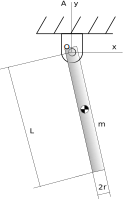

In [2]:
from IPython.display import SVG
SVG('pend_fis.svg')

In [3]:
A = me.ReferenceFrame('A')

In [4]:
m,r,L = sy.symbols('m r L')
q1 = me.dynamicsymbols('q1')
q1d = me.dynamicsymbols('q1',1)
u1 = me.dynamicsymbols('u1')

In [5]:
kde = [q1d-u1]

In [6]:
B = me.ReferenceFrame('B')
B.orient(A,'Axis',[q1,A.z])
B.set_ang_vel(A,u1*A.z)

In [7]:
O = me.Point('O')
O.set_vel(A,0)

In [8]:
p = -L/2*B.y
p

- L/2*B.y

In [9]:
CM = me.Point('CM')
CM.set_pos(O,p)
CM.set_vel(A,p.dt(A))

In [10]:
CM.vel(A)

L*u1/2*B.x

In [11]:
v1 = CM.vel(A).diff(u1,A)
v1

L/2*B.x

In [12]:
w1 = B.ang_vel_in(A).diff(u1,A)
w1

A.z

**Criando o tensor de inércia do cilindo em relação ao seu centro de massa:** <br>
Para o cilindro temos que: 
$$ I_{11}^{*} = I_{22}^{*} = \dfrac{mr^2}{4} + \dfrac{mL^2}{12} \qquad I_{33}^{*} = \dfrac{mr^2}{2} $$

In [13]:
Ix = m*r*2/4 + m*L**2/12
Iz = Ix
Iy = m*r**2/2

In [14]:
I = me.inertia(B,Ix,Iy,Iz)
I

(L**2*m/12 + m*r/2)*(B.x|B.x) + m*r**2/2*(B.y|B.y) + (L**2*m/12 + m*r/2)*(B.z|B.z)

A título de exemplo, obter o tensor de inércia de um ponto no CM em relação ao ponto O <br>
Sabemos que:
$$ \underline{I}^{P*/O} = p^2 \underline{1} - \boldsymbol{v} \otimes \boldsymbol{v} $$

In [15]:
I2 = me.inertia_of_point_mass(m, p, B)

Podemos somar e subtrair tensores de inércia

In [16]:
I3 = I + I2
I3

(L**2*m/3 + m*r/2)*(B.x|B.x) + m*r**2/2*(B.y|B.y) + (L**2*m/3 + m*r/2)*(B.z|B.z)

Podemos agora definir um corpo rígido:<br>
Comando me.RigidBody('B',P,C,M,(I,O))<br>

| Símbolo | Significado |
|---------|-------------|
| B | nome do corpo |
| P | O ponto que representa o centro de massa |
| C | Sistema de referência fixo no corpo |
| m | massa do corpo |
| I | Tensor de inércia |
| O | Ponto em que o tensor de inércia está definido |

In [17]:
Pend = me.RigidBody('Pend',CM,B,m,(I,CM))

**Observação:** Para criar uma partícula utilize o seguinte comando:

In [18]:
Par = me.Particle('Par',CM,m)

**Resolvendo o nosso exemplo:**

In [19]:
Pend.parallel_axis(O)

(L**2*m/3 + m*r/2)*(B.x|B.x) + m*r**2/2*(B.y|B.y) + (L**2*m/3 + m*r/2)*(B.z|B.z)

___

A título de comparação, vamos simular pelo método de Newton-Euler e pelo método de Kane

In [20]:
Pend.linear_momentum(A)

L*m*u1/2*B.x

In [21]:
G = Pend.linear_momentum(A)
G

L*m*u1/2*B.x

In [22]:
G.dt(A)

L*m*u1'/2*B.x + L*m*u1**2/2*B.y

In [23]:
H = Pend.angular_momentum(O,A)
H

(L**2*m*u1/4 + (L**2*m/12 + m*r/2)*u1)*B.z

In [24]:
H.dt(A)

(L**2*m*u1'/4 + (L**2*m/12 + m*r/2)*u1')*B.z

In [25]:
me.find_dynamicsymbols(H,reference_frame=A)

{u1(t)}

### Diagrama de Corpo Livre
Ao utilizar o método de Newton-Euler precisamos fazer DCL. Para o método de Kane isto não é necessário

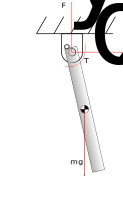

In [26]:
SVG('pend_fis2.svg')

In [27]:
g,Fx,Fy,c = sy.symbols('g Fx Fy c')

In [28]:
F = Fx*A.x + Fy*A.y - m*g*A.y

In [29]:
Fstar = -G.dt(A) # Força de inércia

In [30]:
PrincDAlmbert = F + Fstar
PrincDAlmbert

Fx*A.x + (Fy - g*m)*A.y - L*m*u1'/2*B.x - L*m*u1**2/2*B.y

In [31]:
M_O = -c*u1*A.z + p.cross(-m*g*A.y)

In [32]:
Eq = M_O + (-H.dt(A))
Eq

(-L*g*m*sin(q1)/2 - c*u1)*A.z + (-L**2*m*u1'/4 - (L**2*m/12 + m*r/2)*u1')*B.z

In [33]:
Eqz = Eq.dot(A.z)
Eqz

-L**2*m*Derivative(u1(t), t)/4 - L*g*m*sin(q1(t))/2 - c*u1(t) - (L**2*m/12 + m*r/2)*Derivative(u1(t), t)

In [34]:
print(me.mlatex(Eqz))

- \frac{L^{2} m \dot{u}_{1}}{4} - \frac{L g m \operatorname{sin}\left(q_{1}\right)}{2} - c u_{1} - \left(\frac{L^{2} m}{12} + \frac{m r}{2}\right) \dot{u}_{1}


Equação de Movimento no eixo Z:
$$- \frac{L^{2} m \dot{u}_{1}}{4} - \frac{L g m \operatorname{sin}\left(q_{1}\right)}{2} - c u_{1} - \left(\frac{L^{2} m}{12} + \frac{m r}{2}\right) \dot{u}_{1}
$$

In [35]:
print(Eqz)

-L**2*m*Derivative(u1(t), t)/4 - L*g*m*sin(q1(t))/2 - c*u1(t) - (L**2*m/12 + m*r/2)*Derivative(u1(t), t)


In [36]:
me.mprint(Eqz)

-L**2*m*u1'/4 - L*g*m*sin(q1)/2 - c*u1 - (L**2*m/12 + m*r/2)*u1'


In [37]:
u1d = sy.solve(Eqz,u1.diff())[0]
u1d

-(3*L*g*m*sin(q1(t)) + 6*c*u1(t))/(m*(2*L**2 + 3*r))

In [38]:
import numpy as np

In [39]:
tn = np.linspace(0,20,1000) # criação de um tempo numérico

In [40]:
dic = {m:1,g:9.8,L:0.5,c:0.05,r:0.010} # Unidades no SI

Vamos definir as condições iniciais do nosso sistema

In [41]:
q10 = 0.0
u10 = 1
X0 = [q10,u10]
X0[0]

0.0

Vamos criar uma função em python para receber 2 EDOs de primeira ordem:

In [42]:
def Modelo(X,T):
    q1dot = X[1]
    u1dot = u1d.subs(dic)
    u1dot = u1dot.subs({u1:X[1],q1:X[0]})
    return [q1dot,u1dot]

Vamos usar o comando de integração numérica:

In [43]:
from scipy.integrate import odeint
X = odeint(Modelo,X0,tn)

In [44]:
import matplotlib.pyplot as plt

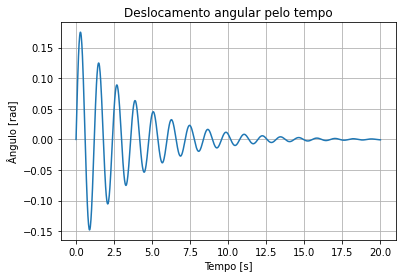

In [45]:
plt.figure()
plt.plot(tn,X[:,0])
plt.xlabel('Tempo [s]')
plt.ylabel('Ângulo [rad]')
plt.title('Deslocamento angular pelo tempo')
plt.grid(True)

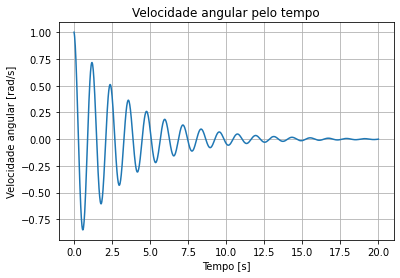

In [46]:
plt.figure()
plt.plot(tn,X[:,1])
plt.xlabel('Tempo [s]')
plt.ylabel('Velocidade angular [rad/s]')
plt.title('Velocidade angular pelo tempo')
plt.grid(True)

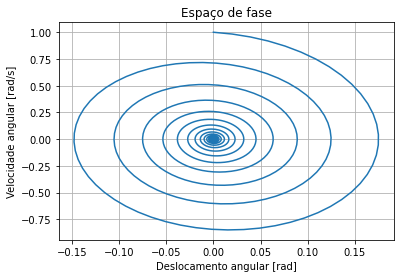

In [47]:
plt.figure()
plt.plot(X[:,0],X[:,1])
plt.xlabel('Deslocamento angular [rad]')
plt.ylabel('Velocidade angular [rad/s]')
plt.title('Espaço de fase')
plt.grid(True)

____

Por enquanto, apenas a título de comparação:

In [48]:
Fl = [(CM,-m*g*A.y),(B,-c*u1*A.z)]

In [49]:
Bl = [Pend]

In [50]:
KM = me.KanesMethod(A,q_ind=[q1],u_ind=[u1],kd_eqs=kde)

In [51]:
Fr,Frstar = KM.kanes_equations(Bl,Fl)

In [52]:
import pydy.system as dy

In [53]:
cond_ini = {q1:0.0,u1:1}

In [54]:
sistema = dy.System(KM,constants = dic, initial_conditions = cond_ini, times = tn)

In [55]:
Q = sistema.integrate()

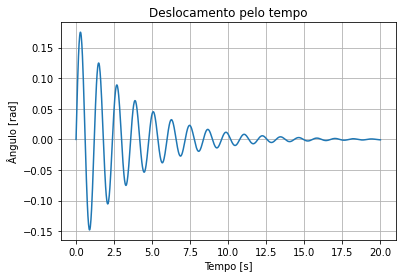

In [56]:
plt.figure()
plt.plot(tn,Q[:,0])
plt.xlabel('Tempo [s]')
plt.ylabel('Ângulo [rad]')
plt.title('Deslocamento pelo tempo')
plt.grid(True)

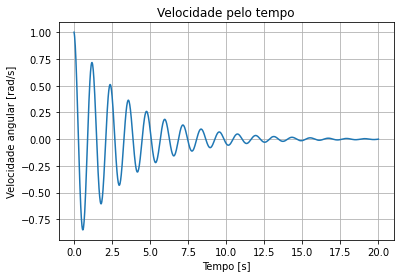

In [57]:
plt.figure()
plt.plot(tn,Q[:,1])
plt.xlabel('Tempo [s]')
plt.ylabel('Velocidade angular [rad/s]')
plt.title('Velocidade pelo tempo')
plt.grid(True)

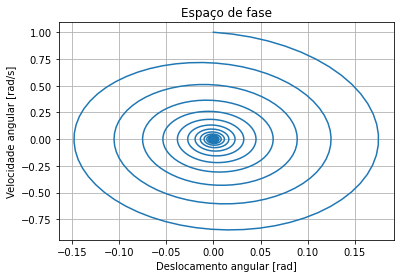

In [58]:
plt.figure()
plt.plot(Q[:,0],Q[:,1])
plt.xlabel('Deslocamento angular [rad]')
plt.ylabel('Velocidade angular [rad/s]')
plt.title('Espaço de fase')
plt.grid(True)